In this assignment, you will perform predictive analytics. You are given a CSV data file (data2020.student.csv)
which contains a total of 1100 samples. The first 1000 samples have already been categorised into
two classes. You are asked to predict the class labels of the last 100 samples associated with IDs
from 1001 to 1100

Import the libraries

In [ ]:
# Imported Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

Import datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
relative_path = '/content/drive/My Drive/'

Mounted at /content/drive


In [ ]:
train_dataset = pd.read_csv(relative_path + 'train_data2020.student.csv')
test_dataset = pd.read_csv(relative_path + 'test_data2020.student.csv')

In [ ]:
train_dataset.shape, test_dataset.shape

((1000, 34), (100, 33))

Data Exploration/ Preprocessing

In [ ]:
train_dataset.set_index('ID')
train_dataset.head()

,ID,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,Class
0,1,3.0,2.0,V1,3,V4,3,V0,600,1,V2,V1,yes,4754,V3,1,V4,F,V2,V2,22,T,0,V1,1,V2,45912,V2,NaN,NaN,600,V1,V2,0
1,2,20.0,1.0,V2,4,V4,20,V4,5003,1,V3,V1,yes,4647,V1,1,V4,F,V5,V3,29,T,0,V2,2,V0,24738,V5,NaN,NaN,5003,V2,V2,1
2,3,11.0,1.0,V4,3,V3,11,V4,3398,2,V4,V1,yes,4510,V3,1,V3,F,V2,V5,36,T,0,V2,1,V3,33726,V2,NaN,NaN,3398,V1,V3,0
3,4,10.0,2.0,V3,2,V4,10,V2,1597,3,V2,V1,no,5098,V3,1,V4,F,V2,V3,40,T,0,V1,1,V0,4466,V2,NaN,NaN,1597,V1,V3,0
4,5,15.0,1.0,V4,2,V4,15,V4,1978,4,V3,V1,yes,4461,V3,1,V4,F,V2,V5,34,T,0,V2,1,V3,35051,V2,NaN,NaN,1978,V1,V3,0


In [ ]:
test_dataset.set_index('ID')
test_dataset.head()

,ID,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32
0,1001,15.0,1.0,V1,2,V1,15,V0,1053,4,V3,V1,no,6834,V3,1,V1,F,V2,V2,27,T,0,V2,1,V3,5384,V2,NaN,NaN,1053,V1,V4
1,1002,11.0,1.0,V2,2,V2,11,V0,1922,4,V2,V1,yes,4274,V3,1,V2,F,V2,V3,37,T,0,V2,1,V2,3524,V2,NaN,NaN,1922,V1,V3
2,1003,26.0,1.0,V4,3,V2,26,V0,7966,2,V3,V1,yes,4622,V3,1,V2,F,V2,V2,30,T,0,V2,2,V1,8773,V2,NaN,NaN,7966,V1,V3
3,1004,24.0,1.0,V4,2,V4,24,V2,2397,3,V3,V1,yes,3535,V1,1,V4,F,V2,V5,34,T,0,V2,2,V3,48469,V2,NaN,NaN,2397,V2,V3
4,1005,5.0,1.0,V1,4,V1,5,V3,666,3,V2,V1,yes,4670,V3,1,V1,F,V4,V4,38,T,0,V2,2,V0,26904,V4,2.0,NaN,666,V2,V2


In [ ]:
train_dataset.describe()

,ID,C1,C2,C4,C6,C8,C9,C13,C15,C20,C22,C24,C26,C28,C30,Class
count,1000.000000,995.000000,996.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.0,1000.000000,1000.0,1000.000000,1000.000000,5.000000,1000.000000,1000.000000
mean,500.500000,20.233166,1.152610,2.846000,20.211000,3283.112000,2.942000,5045.13200,1.0,35.218000,0.0,1.411000,40742.858000,2.400000,3283.112000,0.280000
std,288.819436,12.027212,0.359792,1.109737,12.018941,2851.012246,1.126901,969.87498,0.0,11.737045,0.0,0.583455,30265.389741,1.341641,2851.012246,0.449224
min,1.000000,3.000000,1.000000,1.000000,3.000000,250.000000,1.000000,1586.00000,1.0,18.000000,0.0,1.000000,1125.000000,1.000000,250.000000,0.000000
25%,250.750000,11.000000,1.000000,2.000000,11.000000,1350.500000,2.000000,4383.25000,1.0,26.000000,0.0,1.000000,19004.500000,1.000000,1350.500000,0.000000
50%,500.500000,18.000000,1.000000,3.000000,18.000000,2319.500000,3.000000,5041.50000,1.0,32.000000,0.0,1.000000,33688.000000,3.000000,2319.500000,0.000000
75%,750.250000,24.000000,1.000000,4.000000,24.000000,4041.000000,4.000000,5699.00000,1.0,42.000000,0.0,2.000000,54448.000000,3.000000,4041.000000,1.000000
max,1000.000000,72.000000,2.000000,4.000000,72.000000,18424.000000,4.000000,8618.00000,1.0,75.000000,0.0,4.000000,206111.000000,4.000000,18424.000000,1.000000


In [ ]:
test_dataset.describe()

,ID,C1,C2,C4,C6,C8,C9,C13,C15,C20,C22,C24,C26,C28,C30
count,100.000000,98.000000,98.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.0,100.000000,100.0,100.000000,100.000000,2.00000,100.000000
mean,1050.500000,22.397959,1.142857,2.870000,22.30000,3267.120000,3.090000,4928.450000,1.0,34.360000,0.0,1.400000,43510.450000,3.50000,3267.120000
std,29.011492,13.332960,0.351726,1.069834,13.21577,2561.255884,1.083345,1021.611011,0.0,9.962069,0.0,0.550482,30855.155551,2.12132,2561.255884
min,1001.000000,5.000000,1.000000,1.000000,5.00000,426.000000,1.000000,2900.000000,1.0,20.000000,0.0,1.000000,1224.000000,2.00000,426.000000
25%,1025.750000,11.000000,1.000000,2.000000,11.00000,1419.500000,2.000000,4184.500000,1.0,27.000000,0.0,1.000000,23157.000000,2.75000,1419.500000
50%,1050.500000,18.500000,1.000000,3.000000,18.00000,2486.500000,4.000000,4858.500000,1.0,31.500000,0.0,1.000000,33733.500000,3.50000,2486.500000
75%,1075.250000,35.000000,1.000000,4.000000,35.00000,3938.000000,4.000000,5691.750000,1.0,39.250000,0.0,2.000000,55471.250000,4.25000,3938.000000
max,1100.000000,59.000000,2.000000,4.000000,59.00000,12680.000000,4.000000,7352.000000,1.0,65.000000,0.0,3.000000,158444.000000,5.00000,12680.000000


Visualizations of the features in relation to the classes (0 and 1)

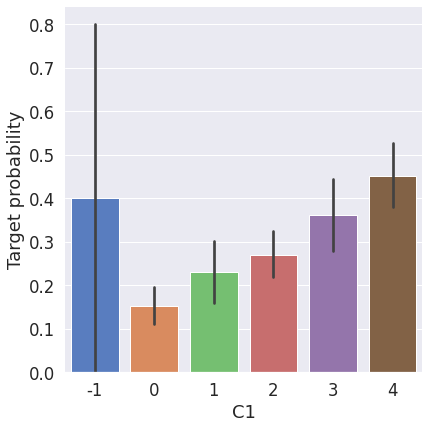

In [ ]:
train_dataset.C1 = pd.qcut(train_dataset.C1.values, 5).codes
# Explore UnsecLines feature vs Target
g  = sns.factorplot(x="C1",y="Class",data=train_dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

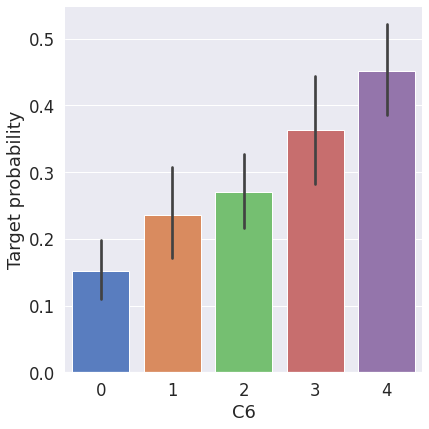

In [ ]:
train_dataset.C6 = pd.qcut(train_dataset.C6.values, 5).codes
# Explore UnsecLines feature vs Target
g  = sns.factorplot(x="C6",y="Class",data=train_dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

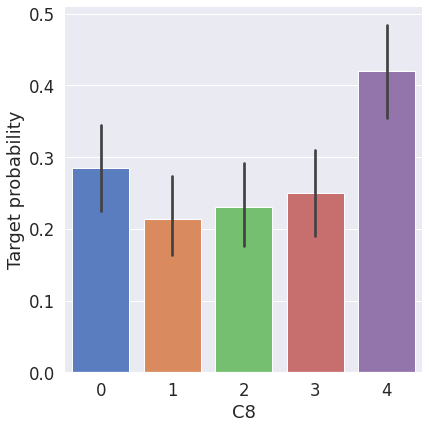

In [ ]:
train_dataset.C8 = pd.qcut(train_dataset.C8.values, 5).codes
# Explore UnsecLines feature vs Target
g  = sns.factorplot(x="C8",y="Class",data=train_dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

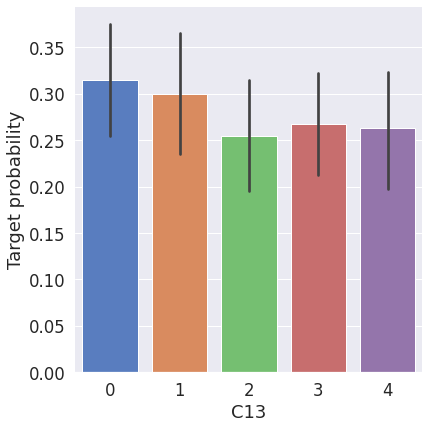

In [ ]:
train_dataset.C13 = pd.qcut(train_dataset.C13.values, 5).codes
# Explore UnsecLines feature vs Target
g  = sns.factorplot(x="C13",y="Class",data=train_dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

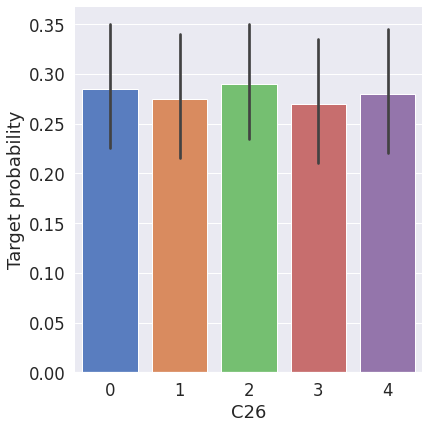

In [ ]:
train_dataset.C26 = pd.qcut(train_dataset.C26.values, 5).codes
# Explore UnsecLines feature vs Target
g  = sns.factorplot(x="C26",y="Class",data=train_dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

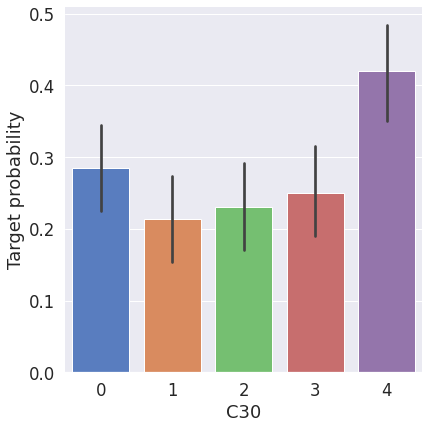

In [ ]:
train_dataset.C30 = pd.qcut(train_dataset.C30.values, 5).codes
# Explore UnsecLines feature vs Target
g  = sns.factorplot(x="C30",y="Class",data=train_dataset,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1000 non-null   int64  
 1   C1      1000 non-null   int8   
 2   C2      996 non-null    float64
 3   C3      1000 non-null   object 
 4   C4      1000 non-null   int64  
 5   C5      1000 non-null   object 
 6   C6      1000 non-null   int8   
 7   C7      1000 non-null   object 
 8   C8      1000 non-null   int8   
 9   C9      1000 non-null   int64  
 10  C10     1000 non-null   object 
 11  C11     1000 non-null   object 
 12  C12     1000 non-null   object 
 13  C13     1000 non-null   int8   
 14  C14     995 non-null    object 
 15  C15     1000 non-null   int64  
 16  C16     1000 non-null   object 
 17  C17     1000 non-null   object 
 18  C18     1000 non-null   object 
 19  C19     996 non-null    object 
 20  C20     1000 non-null   int64  
 21  C21     1000 non-null   object 
 22  C

In [ ]:
train_dataset.isnull().sum()   #%

ID         0
C1         0
C2         4
C3         0
C4         0
C5         0
C6         0
C7         0
C8         0
C9         0
C10        0
C11        0
C12        0
C13        0
C14        5
C15        0
C16        0
C17        0
C18        0
C19        4
C20        0
C21        0
C22        0
C23        0
C24        0
C25        0
C26        0
C27        0
C28      995
C29      996
C30        0
C31        0
C32        0
Class      0
dtype: int64

In [ ]:
test_dataset.isnull().sum()

ID      0
C1      2
C2      2
C3      0
C4      0
C5      0
C6      0
C7      0
C8      0
C9      0
C10     0
C11     0
C12     0
C13     0
C14     1
C15     0
C16     0
C17     0
C18     0
C19     3
C20     0
C21     0
C22     0
C23     0
C24     0
C25     0
C26     0
C27     0
C28    98
C29    99
C30     0
C31     0
C32     0
dtype: int64

How is our target distributed?

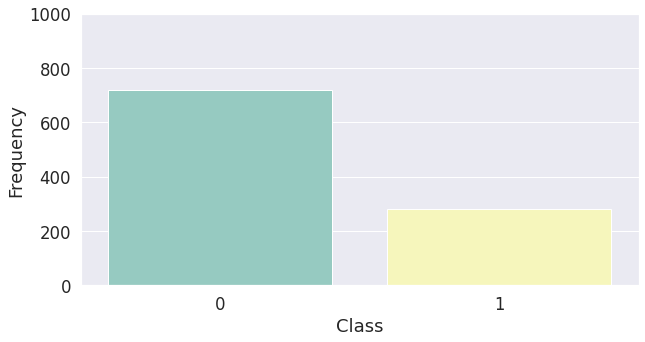

In [ ]:
ax = sns.countplot(x = train_dataset.Class ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = 1000)
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=1000)

plt.show()

From the above, we can see that the distribution of some features are non-normal as seen by the very high standard deviations

In [ ]:
# Lets check for outliers in the dataset
def detect_outliers(df,n,features):
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

# These are the numerical features present in the dataset
Outliers_to_drop_train = detect_outliers(train_dataset,2,['C1', 'C6', 'C8', 'C13', 'C20',
                                                          'C26', 'C30'])
Outliers_to_drop_test = detect_outliers(test_dataset,2,['C1', 'C6', 'C8', 'C13', 'C20',
                                                          'C26', 'C30'])

In [ ]:
train_dataset.loc[Outliers_to_drop_train]

,ID,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,Class


In [ ]:
test_dataset.loc[Outliers_to_drop_test]

,ID,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32
91,1092,47.0,1.0,V3,4,V1,47,V0,7762,4,V4,V1,yes,5462,V1,1,V1,F,V2,V5,42,T,0,V3,1,V0,105176,V2,NaN,NaN,7762,V1,V3


We detected approx 29 outliers in the training set, and 1 outlier for test dataset We will drop these outliers to avoid bias in the classifications.

In [ ]:
train_dataset = train_dataset.drop(Outliers_to_drop_train, axis = 0).reset_index(drop=True)

In [ ]:
test_dataset = test_dataset.drop(Outliers_to_drop_test, axis = 0).reset_index(drop=True)

In [ ]:
train_dataset.shape, test_dataset.shape

((1000, 34), (99, 33))

Exploring Variables

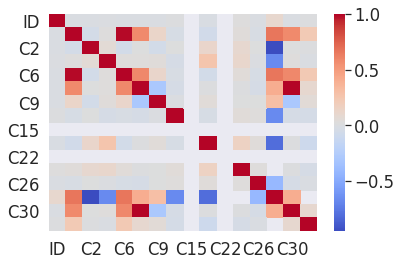

In [ ]:
# Correlation matrix
g = sns.heatmap(train_dataset.corr(),annot=False, fmt = ".2f", cmap = "coolwarm")

From the heatmap, we see a perfect correlation between columns C5 and C16, hence need to get rid of one as they both convey the same information

In [ ]:
train_dataset = train_dataset.drop(['C16'], axis=1)
test_dataset = test_dataset.drop(['C16'], axis=1)

In [ ]:
train_dataset.shape, test_dataset.shape

((1000, 33), (99, 32))

Check for duplicates;

In [ ]:
train_dataset.pivot_table(index=['C15'], aggfunc='size')

C15
1    1000
dtype: int64

In [ ]:
train_dataset.pivot_table(index=['C17'], aggfunc='size')

C17
F    1000
dtype: int64

In [ ]:
train_dataset.pivot_table(index=['C21'], aggfunc='size')

C21
T    1000
dtype: int64

In [ ]:
train_dataset.pivot_table(index=['C22'], aggfunc='size')

C22
0    1000
dtype: int64

All the above 4 columns are duplicates of same value/character, hence no important in our classification

In [ ]:
train_dataset = train_dataset.drop(['C15', 'C17', 'C21', 'C22'], axis=1)
test_dataset = test_dataset.drop(['C15', 'C17', 'C21', 'C22'], axis=1)

In [ ]:
train_dataset.shape, test_dataset.shape

((1000, 29), (99, 28))

Let's get rid of the null values by use of the medians given the non-normality of the data and given that the features have no strong correlation with any other variable to accurately estimate the NaN values. However, we'll get rid of columns 28 and 29 as they provide no information with very negligible contribution.

In [ ]:
train_dataset.C1 = train_dataset.C1.fillna(train_dataset.C1.median())
train_dataset.C2 = train_dataset.C2.fillna(train_dataset.C2.median())

In [ ]:
test_dataset.C1 = test_dataset.C1.fillna(test_dataset.C1.median())
test_dataset.C2 = test_dataset.C2.fillna(test_dataset.C2.median())

In [ ]:
train_dataset = train_dataset.drop(['C28', 'C29'], axis=1)
test_dataset = test_dataset.drop(['C28', 'C29'], axis=1)

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1000 non-null   int64  
 1   C1      1000 non-null   int8   
 2   C2      1000 non-null   float64
 3   C3      1000 non-null   object 
 4   C4      1000 non-null   int64  
 5   C5      1000 non-null   object 
 6   C6      1000 non-null   int8   
 7   C7      1000 non-null   object 
 8   C8      1000 non-null   int8   
 9   C9      1000 non-null   int64  
 10  C10     1000 non-null   object 
 11  C11     1000 non-null   object 
 12  C12     1000 non-null   object 
 13  C13     1000 non-null   int8   
 14  C14     995 non-null    object 
 15  C18     1000 non-null   object 
 16  C19     996 non-null    object 
 17  C20     1000 non-null   int64  
 18  C23     1000 non-null   object 
 19  C24     1000 non-null   int64  
 20  C25     1000 non-null   object 
 21  C26     1000 non-null   int8   
 22  C

In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      99 non-null     int64  
 1   C1      99 non-null     float64
 2   C2      99 non-null     float64
 3   C3      99 non-null     object 
 4   C4      99 non-null     int64  
 5   C5      99 non-null     object 
 6   C6      99 non-null     int64  
 7   C7      99 non-null     object 
 8   C8      99 non-null     int64  
 9   C9      99 non-null     int64  
 10  C10     99 non-null     object 
 11  C11     99 non-null     object 
 12  C12     99 non-null     object 
 13  C13     99 non-null     int64  
 14  C14     98 non-null     object 
 15  C18     99 non-null     object 
 16  C19     96 non-null     object 
 17  C20     99 non-null     int64  
 18  C23     99 non-null     object 
 19  C24     99 non-null     int64  
 20  C25     99 non-null     object 
 21  C26     99 non-null     int64  
 22  C27 

Let's introduce dummies/encoders to facilitate efficient analysis/classification

In [ ]:
train_dataset = pd.get_dummies(train_dataset, columns = ['C3', 'C5', 'C7', 'C10', 'C11', 'C14', 
                                                         'C18', 'C19', 'C23', 'C25', 'C27', 'C31', 'C32'])
test_dataset = pd.get_dummies(test_dataset, columns = ['C3', 'C5', 'C7', 'C10', 'C11', 'C14', 
                                                         'C18', 'C19', 'C23', 'C25', 'C27', 'C31', 'C32'])

In [ ]:
train_dataset['C12'] = pd.Series(map(lambda x: dict(yes=1, no=0)[x], train_dataset['C12'].values.tolist()))
test_dataset['C12'] = pd.Series(map(lambda x: dict(yes=1, no=0)[x], test_dataset['C12'].values.tolist()))

In [ ]:
train_dataset.head()

,ID,C1,C2,C4,C6,C8,C9,C12,C13,C20,C24,C26,C30,Class,C3_V1,C3_V2,C3_V3,C3_V4,C5_V1,C5_V2,C5_V3,C5_V4,C7_V0,C7_V1,C7_V2,C7_V3,C7_V4,C10_V1,C10_V2,C10_V3,C10_V4,C11_V1,C11_V2,C11_V3,C14_V1,C14_V2,C14_V3,C18_V1,C18_V2,C18_V3,C18_V4,C18_V5,C19_V1,C19_V2,C19_V3,C19_V4,C19_V5,C23_V1,C23_V2,C23_V3,C25_V0,C25_V1,C25_V10,C25_V2,C25_V3,C25_V4,C25_V5,C25_V6,C25_V8,C25_V9,C27_V1,C27_V2,C27_V3,C27_V4,C27_V5,C31_V1,C31_V2,C32_V1,C32_V2,C32_V3,C32_V4
0,1,0,2.0,3,0,0,1,1,1,22,1,3,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,2,2,1.0,4,2,4,1,1,1,29,2,1,4,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,3,0,1.0,3,0,3,2,1,1,36,1,2,3,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,4,0,2.0,2,0,1,3,0,2,40,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,5,2,1.0,2,2,2,4,1,1,34,1,2,2,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
test_dataset.head()

,ID,C1,C2,C4,C6,C8,C9,C12,C13,C20,C24,C26,C30,C3_V1,C3_V2,C3_V3,C3_V4,C5_V1,C5_V2,C5_V3,C5_V4,C7_V0,C7_V1,C7_V2,C7_V3,C7_V4,C10_V1,C10_V2,C10_V3,C10_V4,C11_V1,C11_V2,C11_V3,C14_V1,C14_V2,C14_V3,C18_V1,C18_V2,C18_V3,C18_V4,C18_V5,C19_V1,C19_V2,C19_V3,C19_V4,C19_V5,C23_V1,C23_V2,C23_V3,C25_V0,C25_V1,C25_V10,C25_V2,C25_V3,C25_V4,C25_V5,C25_V6,C25_V9,C27_V1,C27_V2,C27_V3,C27_V4,C27_V5,C31_V1,C31_V2,C32_V1,C32_V2,C32_V3,C32_V4
0,1001,15.0,1.0,2,15,1053,4,0,6834,27,1,5384,1053,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,1002,11.0,1.0,2,11,1922,4,1,4274,37,1,3524,1922,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,1003,26.0,1.0,3,26,7966,2,1,4622,30,2,8773,7966,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,1004,24.0,1.0,2,24,2397,3,1,3535,34,2,48469,2397,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4,1005,5.0,1.0,4,5,666,3,1,4670,38,2,26904,666,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0


As mentioned earlier, our classes are highly imbalanced, as further shown below;

In [ ]:
print('0', round(train_dataset['Class'].value_counts()[0]/len(train_dataset) * 100,2), '% of the train dataset')
print('1', round(train_dataset['Class'].value_counts()[1]/len(train_dataset) * 100,2), '% of the train dataset')

0 72.0 % of the train dataset
1 28.0 % of the train dataset


Text(0.5, 1.0, 'Class Distributions \n (0 || 1)')

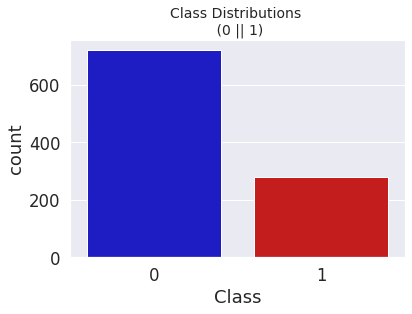

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=train_dataset, palette=colors)
plt.title('Class Distributions \n (0 || 1)', fontsize=14)

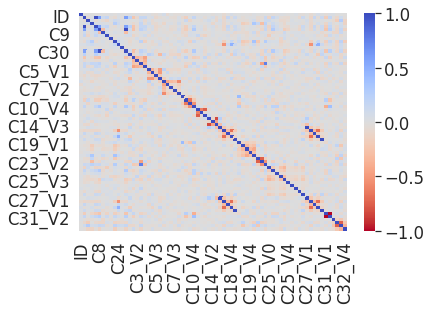

In [ ]:
#correlation matrix
corr = train_dataset.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

From above, we still need to scale/standardize some features; C1, C6, C8, C13, C20, C26 and C30 so that our variables are normalized for analysis.

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

train_dataset['scaled_C1'] = std_scaler.fit_transform(train_dataset['C1'].values.reshape(-1,1))
train_dataset['scaled_C6'] = std_scaler.fit_transform(train_dataset['C6'].values.reshape(-1,1))
train_dataset['scaled_C8'] = std_scaler.fit_transform(train_dataset['C8'].values.reshape(-1,1))
train_dataset['scaled_C13'] = std_scaler.fit_transform(train_dataset['C13'].values.reshape(-1,1))
train_dataset['scaled_C20'] = std_scaler.fit_transform(train_dataset['C20'].values.reshape(-1,1))
train_dataset['scaled_C26'] = std_scaler.fit_transform(train_dataset['C26'].values.reshape(-1,1))
train_dataset['scaled_C30'] = std_scaler.fit_transform(train_dataset['C30'].values.reshape(-1,1))

train_dataset.drop(['C1','C6', 'C8', 'C13', 'C20', 'C26', 'C30'], axis=1, inplace=True)

In [ ]:
scaled_C1 = train_dataset['scaled_C1']
scaled_C6 = train_dataset['scaled_C6']
scaled_C8 = train_dataset['scaled_C8']
scaled_C13 = train_dataset['scaled_C13']
scaled_C20 = train_dataset['scaled_C20']
scaled_C26 = train_dataset['scaled_C26']
scaled_C30 = train_dataset['scaled_C30']

train_dataset.drop(['scaled_C1', 'scaled_C6', 'scaled_C8', 'scaled_C13', 
                    'scaled_C20', 'scaled_C26', 'scaled_C30'], axis=1, inplace=True)

train_dataset.insert(1, 'scaled_C1', scaled_C1)
train_dataset.insert(2, 'scaled_C6', scaled_C6)
train_dataset.insert(3, 'scaled_C8', scaled_C8)
train_dataset.insert(4, 'scaled_C13', scaled_C13)
train_dataset.insert(5, 'scaled_C20', scaled_C20)
train_dataset.insert(6, 'scaled_C26', scaled_C26)
train_dataset.insert(7, 'scaled_C30', scaled_C30)

train_dataset.head()

,ID,scaled_C1,scaled_C6,scaled_C8,scaled_C13,scaled_C20,scaled_C26,scaled_C30,C2,C4,C9,C12,C24,Class,C3_V1,C3_V2,C3_V3,C3_V4,C5_V1,C5_V2,C5_V3,C5_V4,C7_V0,C7_V1,C7_V2,C7_V3,C7_V4,C10_V1,C10_V2,C10_V3,C10_V4,C11_V1,C11_V2,C11_V3,C14_V1,C14_V2,C14_V3,C18_V1,C18_V2,C18_V3,C18_V4,C18_V5,C19_V1,C19_V2,C19_V3,C19_V4,C19_V5,C23_V1,C23_V2,C23_V3,C25_V0,C25_V1,C25_V10,C25_V2,C25_V3,C25_V4,C25_V5,C25_V6,C25_V8,C25_V9,C27_V1,C27_V2,C27_V3,C27_V4,C27_V5,C31_V1,C31_V2,C32_V1,C32_V2,C32_V3,C32_V4
0,1,-1.269575,-1.287284,-1.413154,-0.706754,-1.126741,0.707107,-1.413154,2.0,3,1,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,2,0.121740,0.114223,1.414567,-0.706754,-0.530041,-0.707107,1.414567,1.0,4,1,1,2,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,3,-1.269575,-1.287284,0.707637,-0.706754,0.066660,0.000000,0.707637,1.0,3,2,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,4,-1.269575,-1.287284,-0.706223,0.001416,0.407632,-1.414214,-0.706223,2.0,2,3,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,5,0.121740,0.114223,0.000707,-0.706754,-0.103826,0.000000,0.000707,1.0,2,4,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
test_dataset['scaled_C1'] = std_scaler.fit_transform(test_dataset['C1'].values.reshape(-1,1))
test_dataset['scaled_C6'] = std_scaler.fit_transform(test_dataset['C6'].values.reshape(-1,1))
test_dataset['scaled_C8'] = std_scaler.fit_transform(test_dataset['C8'].values.reshape(-1,1))
test_dataset['scaled_C13'] = std_scaler.fit_transform(test_dataset['C13'].values.reshape(-1,1))
test_dataset['scaled_C20'] = std_scaler.fit_transform(test_dataset['C20'].values.reshape(-1,1))
test_dataset['scaled_C26'] = std_scaler.fit_transform(test_dataset['C26'].values.reshape(-1,1))
test_dataset['scaled_C30'] = std_scaler.fit_transform(test_dataset['C30'].values.reshape(-1,1))

test_dataset.drop(['C1','C6', 'C8', 'C13', 'C20', 'C26', 'C30'], axis=1, inplace=True)

In [ ]:
scaled_C1 = test_dataset['scaled_C1']
scaled_C6 = test_dataset['scaled_C6']
scaled_C8 = test_dataset['scaled_C8']
scaled_C13 = test_dataset['scaled_C13']
scaled_C20 = test_dataset['scaled_C20']
scaled_C26 = test_dataset['scaled_C26']
scaled_C30 = test_dataset['scaled_C30']

test_dataset.drop(['scaled_C1', 'scaled_C6', 'scaled_C8', 'scaled_C13', 
                    'scaled_C20', 'scaled_C26', 'scaled_C30'], axis=1, inplace=True)

test_dataset.insert(1, 'scaled_C1', scaled_C1)
test_dataset.insert(2, 'scaled_C6', scaled_C6)
test_dataset.insert(3, 'scaled_C8', scaled_C8)
test_dataset.insert(4, 'scaled_C13', scaled_C13)
test_dataset.insert(5, 'scaled_C20', scaled_C20)
test_dataset.insert(6, 'scaled_C26', scaled_C26)
test_dataset.insert(7, 'scaled_C30', scaled_C30)

test_dataset.head()

,ID,scaled_C1,scaled_C6,scaled_C8,scaled_C13,scaled_C20,scaled_C26,scaled_C30,C2,C4,C9,C12,C24,C3_V1,C3_V2,C3_V3,C3_V4,C5_V1,C5_V2,C5_V3,C5_V4,C7_V0,C7_V1,C7_V2,C7_V3,C7_V4,C10_V1,C10_V2,C10_V3,C10_V4,C11_V1,C11_V2,C11_V3,C14_V1,C14_V2,C14_V3,C18_V1,C18_V2,C18_V3,C18_V4,C18_V5,C19_V1,C19_V2,C19_V3,C19_V4,C19_V5,C23_V1,C23_V2,C23_V3,C25_V0,C25_V1,C25_V10,C25_V2,C25_V3,C25_V4,C25_V5,C25_V6,C25_V9,C27_V1,C27_V2,C27_V3,C27_V4,C27_V5,C31_V1,C31_V2,C32_V1,C32_V2,C32_V3,C32_V4
0,1001,-0.544188,-0.543261,-0.860366,1.873124,-0.733259,-1.241022,-0.860366,1.0,2,4,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,1002,-0.852483,-0.851471,-0.515619,-0.636216,0.273574,-1.302571,-0.515619,1.0,2,4,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,1003,0.303624,0.304319,1.882135,-0.295103,-0.431209,-1.128878,1.882135,1.0,3,2,1,2,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,1004,0.149476,0.150214,-0.327179,-1.360592,-0.028476,0.184694,-0.327179,1.0,2,3,1,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4,1005,-1.314925,-1.313788,-1.013895,-0.248053,0.374257,-0.528909,-1.013895,1.0,4,3,1,2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0


Splitting the Data (Original DataFrame)

Although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('0', round(train_dataset['Class'].value_counts()[0]/len(train_dataset) * 100,2), '% of the train dataset')
print('1', round(train_dataset['Class'].value_counts()[1]/len(train_dataset) * 100,2), '% of the train dataset')

X = train_dataset.drop(['Class', 'ID'], axis=1)
y = train_dataset['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why we're using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

0 72.0 % of the train dataset
1 28.0 % of the train dataset
Train: [185 186 193 202 203 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343
 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361
 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379
 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397
 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 424 425 426 427 428 429 

Random Under-Sampling:

In [ ]:
print(train_dataset['Class'].value_counts()[0])
print(train_dataset['Class'].value_counts()[1])

720
280


In [ ]:
## Separate train features and label 
train_dataset["Class"] = train_dataset["Class"].astype(int)
y_train_dataset = train_dataset["Class"]
X_train_dataset = train_dataset.drop(labels = ["Class", "ID"],axis = 1)

In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# Lets shuffle the data before creating the subsamples

df = train_dataset.sample(frac=1, axis=1)

# amount of default classes 492 rows.
default_df = train_dataset.loc[train_dataset['Class'] == 1]
non_default_df = train_dataset.loc[train_dataset['Class'] == 0][:265]
normal_distributed_df = pd.concat([default_df, non_default_df])
# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,ID,scaled_C1,scaled_C6,scaled_C8,scaled_C13,scaled_C20,scaled_C26,scaled_C30,C2,C4,C9,C12,C24,Class,C3_V1,C3_V2,C3_V3,C3_V4,C5_V1,C5_V2,C5_V3,C5_V4,C7_V0,C7_V1,C7_V2,C7_V3,C7_V4,C10_V1,C10_V2,C10_V3,C10_V4,C11_V1,C11_V2,C11_V3,C14_V1,C14_V2,C14_V3,C18_V1,C18_V2,C18_V3,C18_V4,C18_V5,C19_V1,C19_V2,C19_V3,C19_V4,C19_V5,C23_V1,C23_V2,C23_V3,C25_V0,C25_V1,C25_V10,C25_V2,C25_V3,C25_V4,C25_V5,C25_V6,C25_V8,C25_V9,C27_V1,C27_V2,C27_V3,C27_V4,C27_V5,C31_V1,C31_V2,C32_V1,C32_V2,C32_V3,C32_V4
48,49,-0.573917,-0.586531,-1.413154,0.001416,-1.126741,-0.707107,-1.413154,1.0,4,4,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
285,286,0.121740,0.114223,0.707637,0.001416,0.578118,-1.414214,0.707637,1.0,3,3,1,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
115,116,0.121740,0.114223,0.707637,-1.414925,-0.956255,-0.707107,0.707637,1.0,2,4,1,2,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
327,328,-0.573917,-0.586531,-0.706223,-1.414925,-0.956255,0.000000,-0.706223,1.0,2,2,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
292,293,1.513055,1.515729,1.414567,0.709587,-0.700527,-0.707107,1.414567,1.0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


Equally Distributing and Correlating:

Distribution of the Classes in the subsample dataset
1    0.513761
0    0.486239
Name: Class, dtype: float64


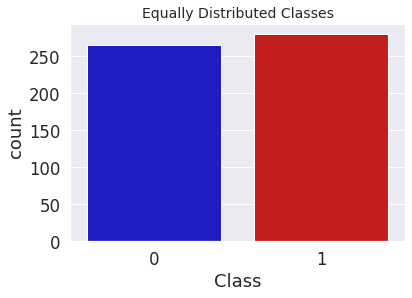

In [ ]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

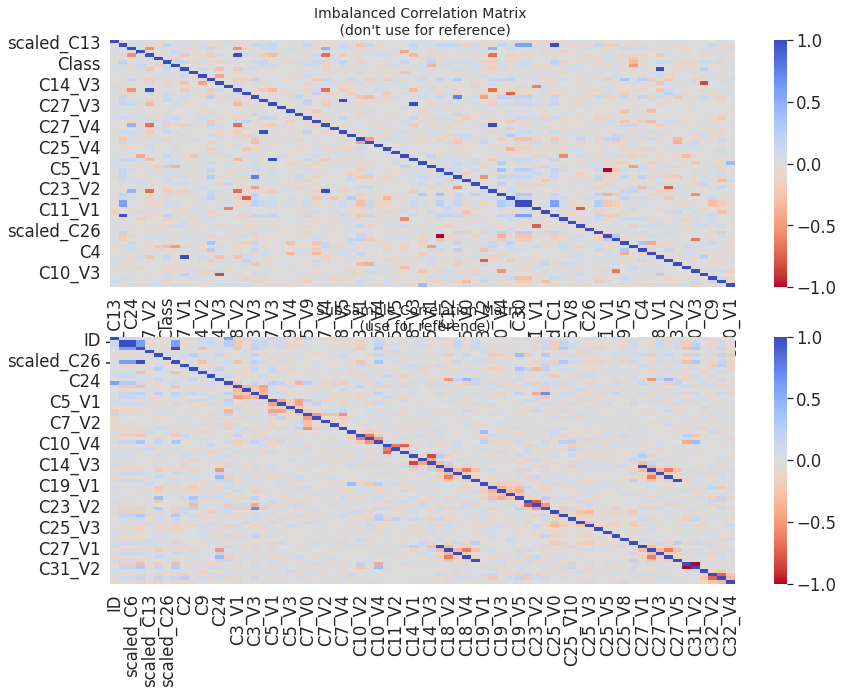

In [ ]:
# Make sure we use the subsample in our correlation
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,10))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
#let's compare the two correlation matrices before and after scaling and undersampling
plt.show()

t-SNE algorithm can pretty accurately cluster the 0 and 1 classes in our dataset. Although the subsample is pretty small, the t-SNE algorithm is able to detect clusters pretty accurately in every scenario (we shuffle the dataset before running t-SNE). This indicates that further predictive models will perform pretty well in separating default from non-default cases.

In [ ]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop(['Class', 'ID'], axis = 1)
y = new_df['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 3.5 s
PCA took 0.031 s
Truncated SVD took 0.0039 s


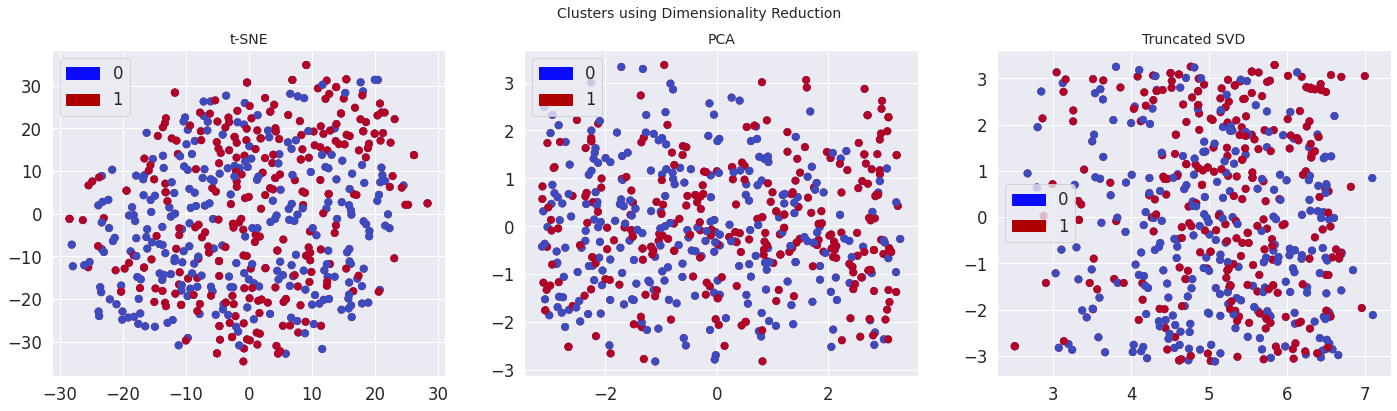

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['0', '1']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='0')
red_patch = mpatches.Patch(color='#AF0000', label='1')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='0', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='1', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='0', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='1', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='0', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='1', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

Classifiers (UnderSampling):

In [ ]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop(['Class', 'ID'], axis=1)
y = new_df['Class']

In [ ]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split
# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
# Let's implement simple classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 74.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 64.0 % accuracy score
Classifiers:  SVC Has a training score of 73.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 64.0 % accuracy score


In [ ]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# log_reg best estimator
log_reg = grid_log_reg.best_estimator_

In [ ]:
# kNN classifier
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

In [ ]:
# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
# SVC best estimator
svc = grid_svc.best_estimator_

In [ ]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [ ]:
# Overfitting Case
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  74.31%
Knears Neighbors Cross Validation Score 65.37%
Support Vector Classifier Cross Validation Score 73.62%
DecisionTree Classifier Cross Validation Score 66.74%


In [ ]:
# We will undersample during cross validating
undersample_X = df.drop(['Class', 'ID'], axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way
for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [185 186 193 202 203 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325
 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343
 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361
 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379
 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397
 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415
 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433
 434 435 436 437 438 439 440 441 442 443 444

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [ ]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.7866357992212984
KNears Neighbors:  0.6552772808586762
Support Vector Classifier:  0.783163211617384
Decision Tree Classifier:  0.6649373881932021


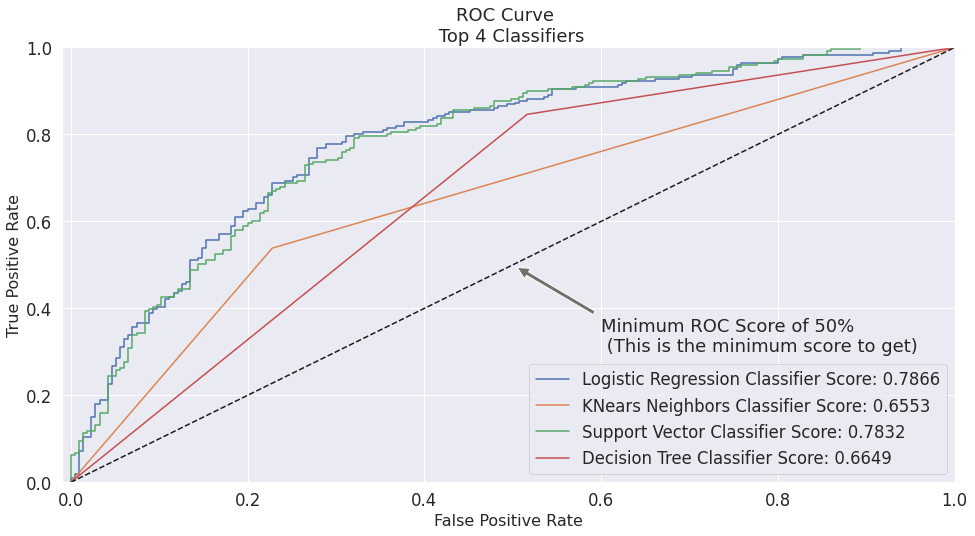

In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.60
Precision Score: 0.51
F1 Score: 0.55
Accuracy Score: 0.51
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.45
Precision Score: 0.44
Recall Score: 0.74
F1 Score: 0.55
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [ ]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.29


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.29')

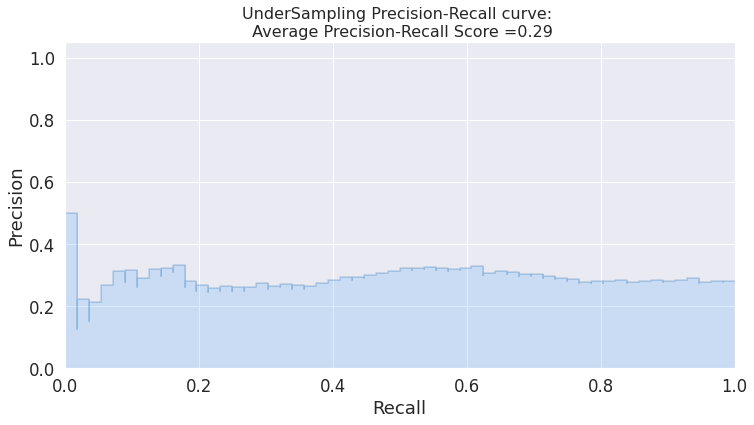

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

SMOTE Technique (Over-Sampling):

SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.

It picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.

Here, more information is retained since we didn't have to delete any rows unlike in random undersampling.

Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()

rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)
# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 800 | Length of y (train): 800
Length of X (test): 200 | Length of y (test): 200
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.72375
precision: 0.5048459383753501
recall: 0.7013131313131313
f1: 0.5865873015873015
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
labels = ['0', '1']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       144
           1       0.54      0.70      0.61        56

    accuracy                           0.75       200
   macro avg       0.70      0.73      0.71       200
weighted avg       0.78      0.75      0.76       200



In [ ]:
y_score = best_est.decision_function(original_Xtest)

In [ ]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.61


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.61')

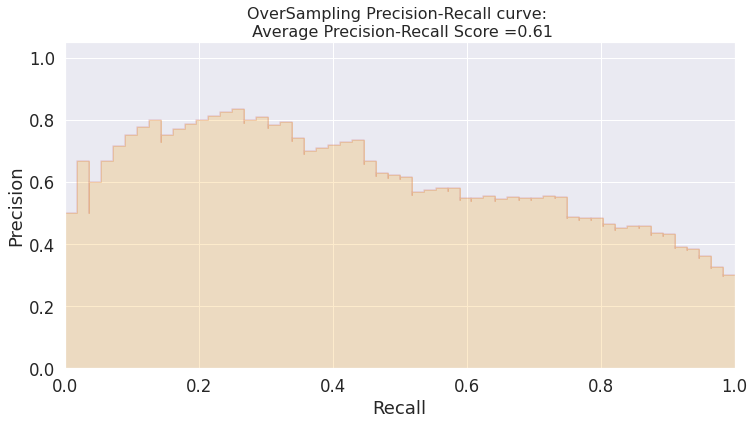

In [ ]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [ ]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(ratio='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)
# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)

In [ ]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :0.07066535949707031 sec


Test Data with Logistic Regression:

We will evaluate the final performance of the classification models in the random undersampling subset (this is not the data from the original dataframe).The models that performed the best were logistic regression and support vector classifier (SVM).

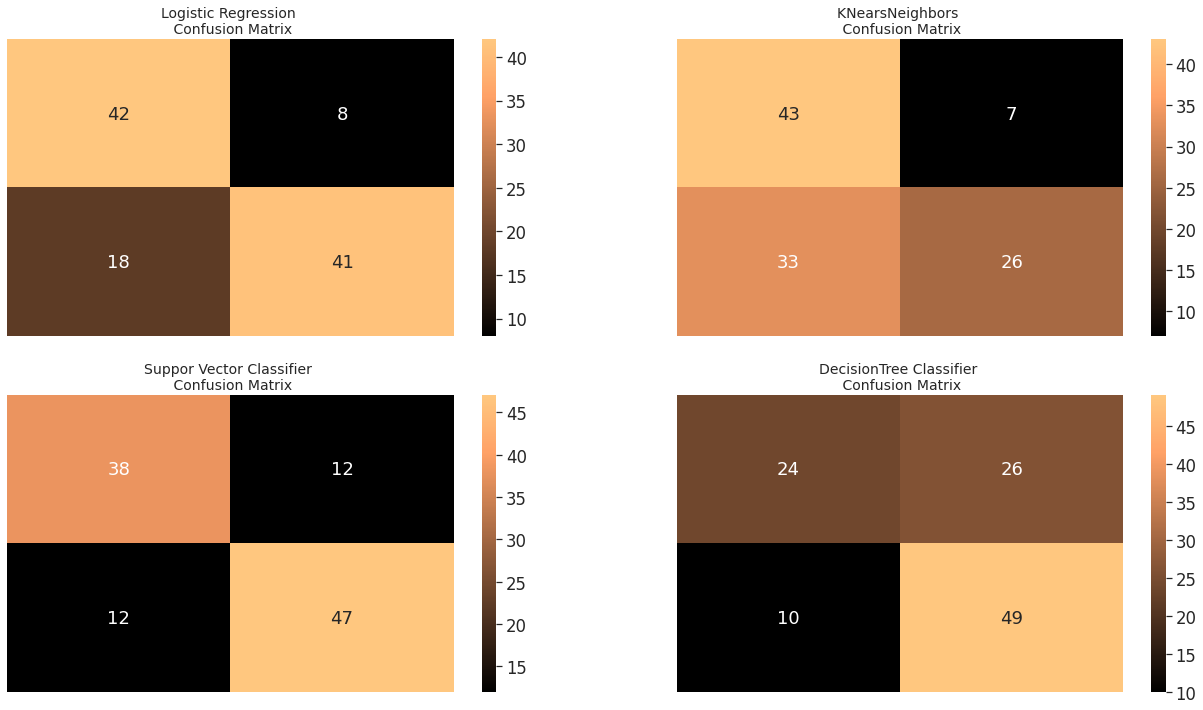

In [ ]:
from sklearn.metrics import confusion_matrix
# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)
# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

From above plots, top left and bottom right represent correctly predicted classes i.e. the true positives from the model and the true negatives respectively.

In [ ]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.84      0.76        50
           1       0.84      0.69      0.76        59

    accuracy                           0.76       109
   macro avg       0.77      0.77      0.76       109
weighted avg       0.77      0.76      0.76       109

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.57      0.86      0.68        50
           1       0.79      0.44      0.57        59

    accuracy                           0.63       109
   macro avg       0.68      0.65      0.62       109
weighted avg       0.69      0.63      0.62       109

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        50
           1       0.80      0.80      0.80        59

    accuracy                           0.78       109
   macro avg       0.78      0.78      0.78       109
weighted

In [ ]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Technique,Score
0,Random UnderSampling,0.761468
1,Oversampling (SMOTE),0.750000


Feature Importance visual;

In [ ]:
rfc = RandomForestClassifier(n_estimators=50, max_features='sqrt')
train_fit = rfc.fit(X_train, y_train)

In [ ]:
features = pd.DataFrame()
features['feature'] = X_train_dataset.columns
features['importance'] = rfc.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

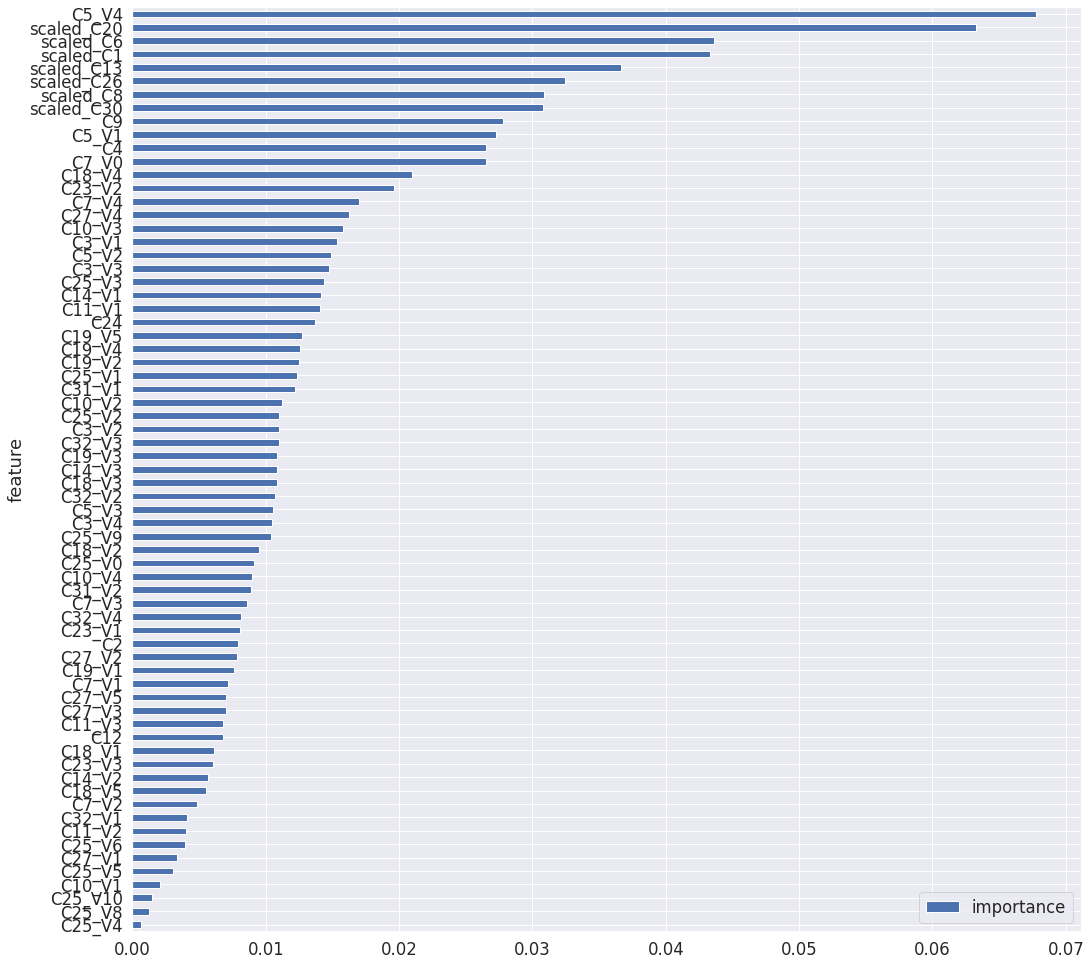

In [ ]:
features.plot(kind='barh', figsize=(17, 17))

Results file;

In [ ]:
results_df = pd.read_csv(relative_path + 'test_data2020.student.csv')

In [ ]:
results_df = results_df.drop(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
                              'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 
                              'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28',
                              'C29', 'C30', 'C31', 'C32'], axis=1)

In [ ]:
results_df['Predict1'] = y_pred_log_reg[:100]
results_df['Predict2'] = y_pred_svc[:100]
results_df

,ID,Predict1,Predict2
0,1001,1,0
1,1002,1,1
2,1003,1,1
3,1004,0,1
4,1005,0,0
...,...,...,...
95,1096,1,1
96,1097,1,1
97,1098,0,0
98,1099,1,1


In [ ]:
results_df.to_csv(relative_path + "pred_assign.csv", index=False)

In [ ]:
results_df.head(10)

,ID,Predict1,Predict2
0,1001,1,0
1,1002,1,1
2,1003,1,1
3,1004,0,1
4,1005,0,0
5,1006,1,1
6,1007,1,1
7,1008,1,1
8,1009,1,0
9,1010,0,0
